<h1>Importación de librerias</h1>

In [1]:
import os
import pandas as pd
from osgeo import gdal
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Proceso de carga de datos en formato .TIF para poder ser manipulados y visualizados</h2>
<p>Creamos vectores donde almacenar los nombres de archivos</p>

In [2]:
dir = "Raster/Lupion"
ficheros=[]
nombre=[]

<p>Path de ficheros TIF para ordenarlos</p>

In [3]:
for file in os.listdir(dir):
        if file.endswith(".tif"):
            ficheros.append(os.path.join(dir, file))
            nombre.append(file.split('.')[0])

<p>Ordenamos por nombre la lista de ficheros y de nombres de ficheros</p>

In [4]:
sorted(ficheros)
sorted(nombre)

['Carcavas',
 'Curvatura_Perfil',
 'Curvatura_Plana',
 'Distancia_Carreteras',
 'Factor_LS',
 'Geologia',
 'Orientaciones',
 'Overland_Flow_Distance',
 'Pendiente',
 'Stream_Power_Index',
 'Topographic_Position_Index',
 'Topographic_Wetness_Index',
 'Unidades_Edaficas',
 'Usos_Del_Suelo']

<p>Creamos un Dataframe con el nombre de los TIF</p>

In [5]:
datos = pd.DataFrame(columns=nombre)

<p>Recoger tamaño de las imagenes TIF que vamos a tratar</p>

In [6]:
tif = gdal.Open(ficheros[1])
print(ficheros[1])
tif_band = tif.GetRasterBand(1)
x = tif_band.XSize
y = tif_band.YSize
print("Tamaño archivos cargados:",x,"x",y,"\n")

Raster/Lupion\Curvatura_Perfil.tif
Tamaño archivos cargados: 4626 x 1913 



Recorremos lista de ficheros. SOLO TRATAMOS LOS DATOS NO DATA -> -1

In [7]:
contador = 0
for f in ficheros:
    n = nombre[contador]
    MDT = gdal.Open(f)
    
    # Patrones sin datos se incluyen como -1
    MDT.GetRasterBand(1).SetNoDataValue(-1)
    
    # Pasamos los datos a float
    band = MDT.GetRasterBand(1).ReadAsArray().astype(float)
    
    # Se desechan las dos primeras filas y columnas debido a calculos de borde
    band = band[1:y, 1:x]
    
    # Reconstruimos el array con el tamaño de filas x columnas
    x_recorte = x - 1
    y_recorte = y - 1
    band = np.reshape(band, x_recorte*y_recorte)
    
    # Estos serán nuestros datos
    datos[n] = band
    
    contador = contador + 1

<hr></hr>

<h2>Tratamiento de datos</h2>

In [8]:
print("Número de datos antes del tratamiento ", datos.size)

datos = datos[datos['Carcavas'] != -9999]
datos = datos[datos['Orientaciones'] != 0]
datos = datos[datos['Distancia_Carreteras'] >= 0]
datos = datos[datos['Factor_LS'] >= 0]
datos = datos[datos['Pendiente'] != -9999.0]
datos = datos[datos['Overland_Flow_Distance'] != -99999.0]

print("Número de datos despues del tratamiento ", datos.size)

datos.Factor_LS = datos.Factor_LS.round(4) 

Número de datos antes del tratamiento  123802000
Número de datos despues del tratamiento  46747876


<hr>

<h1>Proceso de visualización de datos</h1>

<b>1. ALTITUD (Continua) FALTA ESTA VARIABLE</b>

<hr>

<b>2. ARCILLAS (Continua) FALTA ESTA VARIABLE</b>

<hr>

<b>3. ARENAS (Continua) FALTA ESTA VARIABLE</b>

<hr>

<b>4. CARBONATOS (Discreta) FALTA ESTA VARIABLE</b>

<hr>

<b>5. CARBONO ORGÁNICO (Continua) FALTA ESTA VARIABLE</b>

<hr>

<b>6. CARCAVAS (Categórica)</b>

In [9]:
print(datos.Carcavas.unique())

[0. 1.]


In [10]:
print("Máximo: ", max(datos.Carcavas))
print("Mínimo: ", min(datos.Carcavas))
print("Media: ", datos["Carcavas"].mean())
print("STD: ", datos["Carcavas"].std())

Máximo:  1.0
Mínimo:  0.0
Media:  0.008894821232091914
STD:  0.09389199128774135


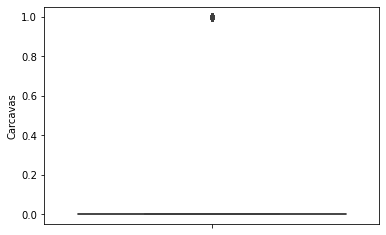

In [11]:
sns.boxplot( y=datos["Carcavas"] );
plt.show()

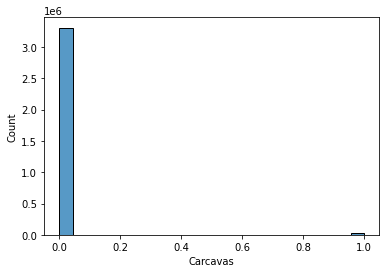

In [12]:
sns.histplot(data=datos, x="Carcavas")
plt.show()

<hr>

<b>7. CURVATURA PERFIL (Continua)</b>

In [13]:
print(datos.Curvatura_Perfil.unique())

[-2.5457046  -3.27756834 -0.9579531  ... -0.07064843 -3.50229216
 -8.27599812]


In [14]:
print("Máximo: ", max(datos.Curvatura_Perfil))
print("Mínimo: ", min(datos.Curvatura_Perfil))
print("Media: ", datos["Curvatura_Perfil"].mean())
print("STD: ", datos["Curvatura_Perfil"].std())

Máximo:  22.531675338745117
Mínimo:  -24.181676864624023
Media:  -0.00035272486521645133
STD:  0.8857314565894898


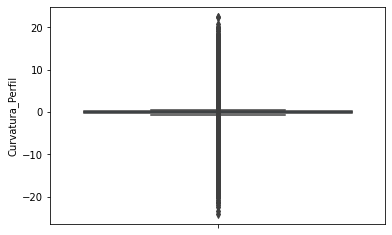

In [15]:
sns.boxplot( y=datos["Curvatura_Perfil"] );
plt.show()

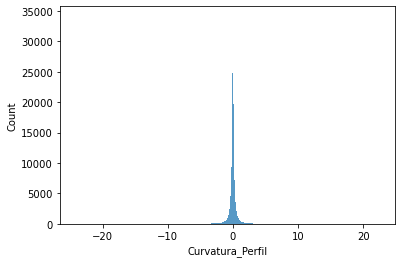

In [16]:
sns.histplot(data=datos, x="Curvatura_Perfil")
plt.show()

<hr>

<b>8. CURVATURA PLANA (Continua)</b>

In [17]:
print(datos.Curvatura_Plana.unique())

[ 0.41559911 -0.36997566  2.03191495 ...  0.40274024 -0.22262916
  1.02319574]


In [18]:
print("Máximo: ", max(datos.Curvatura_Plana))
print("Mínimo: ", min(datos.Curvatura_Plana))
print("Media: ", datos["Curvatura_Plana"].mean())
print("STD: ", datos["Curvatura_Plana"].std())

Máximo:  14.572258949279785
Mínimo:  -19.07381820678711
Media:  0.005837030362358969
STD:  0.5398811847681003


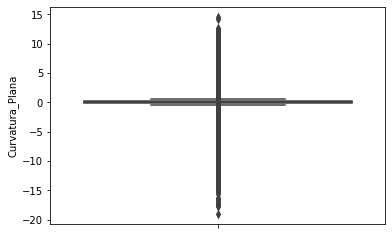

In [19]:
sns.boxplot( y=datos["Curvatura_Plana"] );
plt.show()

<hr>

<b>9. DISTANCIA CARRETERAS (Continua)</b>

In [20]:
print(datos.Distancia_Carreteras.unique())

[ 539.67584229  534.81304932  529.95281982 ... 2041.9230957  1562.17797852
 1941.66162109]


In [21]:
print("Máximo: ", max(datos.Distancia_Carreteras))
print("Mínimo: ", min(datos.Distancia_Carreteras))
print("Media: ", datos["Distancia_Carreteras"].mean())
print("STD: ", datos["Distancia_Carreteras"].std())

Máximo:  2873.434326171875
Mínimo:  0.0
Media:  668.795569372018
STD:  554.124632296974


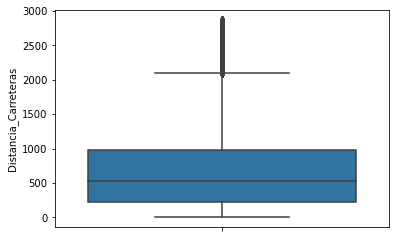

In [22]:
sns.boxplot( y=datos["Distancia_Carreteras"] );
plt.show()

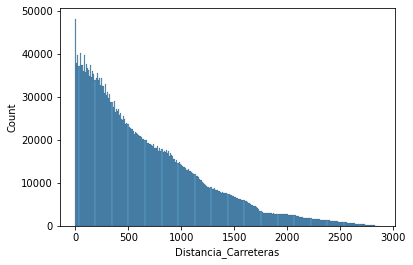

In [23]:
sns.histplot(data=datos, x="Distancia_Carreteras")
plt.show()

<hr>

<b>10. FACTOR LS (Continua)</b>

In [24]:
print(datos.Factor_LS.unique())

[ 1.7311  1.079  23.4947 ... 38.0568 31.0289 33.4284]


In [25]:
print("Máximo: ", max(datos.Factor_LS))
print("Mínimo: ", min(datos.Factor_LS))
print("Media: ", datos["Factor_LS"].mean())
print("STD: ", datos["Factor_LS"].std())

Máximo:  777.217
Mínimo:  0.0
Media:  38.01421948879685
STD:  39.642681007316135


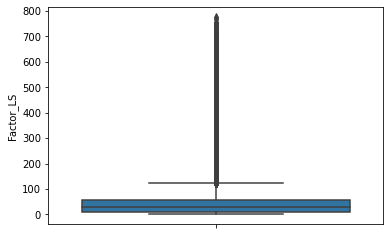

In [26]:
sns.boxplot( y=datos["Factor_LS"] );
plt.show()

<hr>

<b>11. GEOLOGIA (Categórico)</b>

In [27]:
print(datos.Geologia.unique())

[9001. 9000. 9002. 9133. 9004. 9003. 9134. 8996.]


In [28]:
print("Máximo: ", max(datos.Geologia))
print("Mínimo: ", min(datos.Geologia))
print("Media: ", datos["Geologia"].mean())
print("STD: ", datos["Geologia"].std())

Máximo:  9134.0
Mínimo:  8996.0
Media:  9067.762910982308
STD:  65.58863689072966


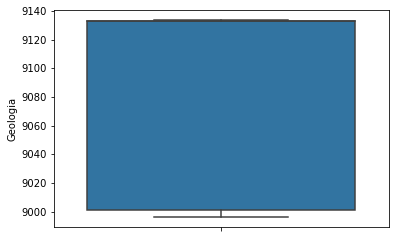

In [29]:
sns.boxplot( y=datos["Geologia"] );
plt.show()

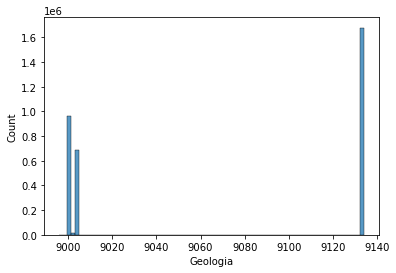

In [30]:
sns.histplot(data=datos, x="Geologia")
plt.show()

<hr>

<b>12. LIMOS (Continua) FALTA ESTA VARIABLE</b>

<hr>

<b>13. ORIENTACIONES (Categórica)</b>

In [31]:
print(datos.Orientaciones.unique())

[ 78.28440094  73.54734039  24.52593994 ... 161.56790161 138.10861206
 133.4571991 ]


In [32]:
print("Máximo: ", max(datos.Orientaciones))
print("Mínimo: ", min(datos.Orientaciones))
print("Media: ", datos["Orientaciones"].mean())
print("STD: ", datos["Orientaciones"].std())

Máximo:  359.9991760253906
Mínimo:  -3.4028230607370965e+38
Media:  -2.7270407568346975e+35
STD:  9.629228007246198e+36


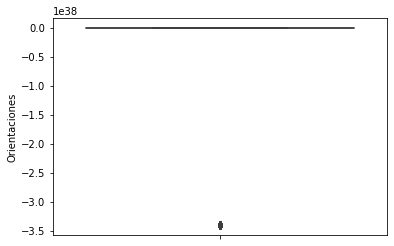

In [33]:
sns.boxplot( y=datos["Orientaciones"] );
plt.show()

<hr>

<b>14. OVERLAND FLOW DISTANCE (Continua)</b>

In [34]:
print(datos.Overland_Flow_Distance.unique())

[407.97674561 402.97674561 396.22735596 ... 619.82208252 617.69238281
 621.74475098]


In [35]:
print("Máximo: ", max(datos.Overland_Flow_Distance))
print("Mínimo: ", min(datos.Overland_Flow_Distance))
print("Media: ", datos["Overland_Flow_Distance"].mean())
print("STD: ", datos["Overland_Flow_Distance"].std())

Máximo:  4432.41845703125
Mínimo:  0.0
Media:  1049.411322223862
STD:  754.7027284797534


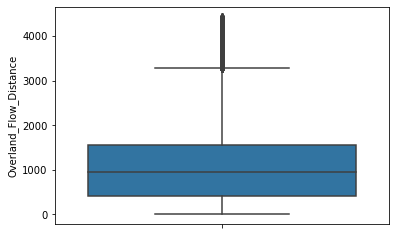

In [36]:
sns.boxplot( y=datos["Overland_Flow_Distance"] );
plt.show()

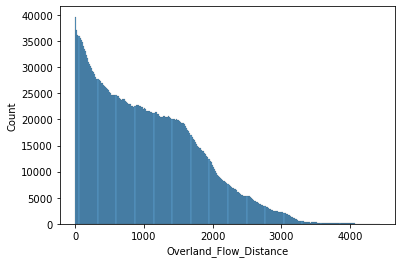

In [37]:
sns.histplot(data=datos, x="Overland_Flow_Distance")
plt.show()

<hr>

<b>15. PENDIENTE (Continua)</b>

In [38]:
print(datos.Pendiente.unique())

[ 8.50375938  5.22615385  1.495983   ...  1.3615371   6.87220955
 20.47771454]


In [39]:
print("Máximo: ", max(datos.Pendiente))
print("Mínimo: ", min(datos.Pendiente))
print("Media: ", datos["Pendiente"].mean())
print("STD: ", datos["Pendiente"].std())

Máximo:  58.51284408569336
Mínimo:  -3.4028230607370965e+38
Media:  -2.7270407568346975e+35
STD:  9.629228007246198e+36


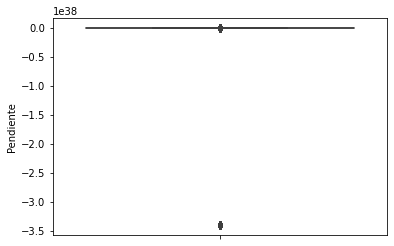

In [40]:
sns.boxplot( y=datos["Pendiente"] );
plt.show()

<hr>

<b>15. STREAM POWER INDEX (Continua)</b>

In [41]:
print(datos.Stream_Power_Index.unique())

[  7.04636574   5.69571209 -59.85406876 ...  17.54521751   4.61318827
 696.81542969]


In [42]:
print("Máximo: ", max(datos.Stream_Power_Index))
print("Mínimo: ", min(datos.Stream_Power_Index))
print("Media: ", datos["Stream_Power_Index"].mean())
print("STD: ", datos["Stream_Power_Index"].std())

Máximo:  5968616960.0
Mínimo:  -66611159040.0
Media:  -26686.66353917733
STD:  38052236.65555785


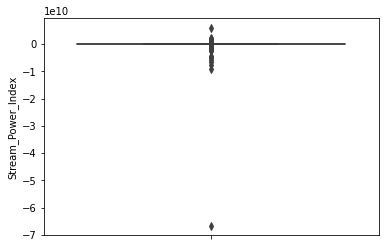

In [43]:
sns.boxplot( y=datos["Stream_Power_Index"] );
plt.show()

<hr>

<b>16. TOPOGRAPHIC POSITION INDEX (Continua)</b>

In [44]:
print(datos.Topographic_Position_Index.unique())

[1.36360264 1.27622461 0.62323272 ... 5.65434122 5.9820528  6.35211086]


In [45]:
print("Máximo: ", max(datos.Topographic_Position_Index))
print("Mínimo: ", min(datos.Topographic_Position_Index))
print("Media: ", datos["Topographic_Position_Index"].mean())
print("STD: ", datos["Topographic_Position_Index"].std())

Máximo:  24.465299606323242
Mínimo:  -17.413028717041016
Media:  0.04935783150051139
STD:  2.007167607729719


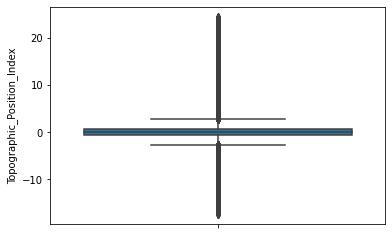

In [46]:
sns.boxplot( y=datos["Topographic_Position_Index"] );
plt.show()

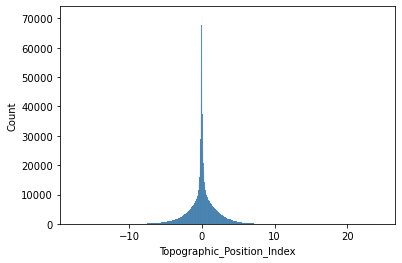

In [47]:
sns.histplot(data=datos, x="Topographic_Position_Index")
plt.show()

<hr>

<b>18. TOPOGRAPHIC WETNESS INDEX (Continua)</b>

In [48]:
print(datos.Topographic_Wetness_Index.unique())

[ 4.48523951  4.70225286 10.41508102 ...  3.57297015  5.02132416
 -0.06511013]


In [49]:
print("Máximo: ", max(datos.Topographic_Wetness_Index))
print("Mínimo: ", min(datos.Topographic_Wetness_Index))
print("Media: ", datos["Topographic_Wetness_Index"].mean())
print("STD: ", datos["Topographic_Wetness_Index"].std())

Máximo:  22.791540145874023
Mínimo:  -7.564307689666748
Media:  9.169662934751123
STD:  3.8533803567048106


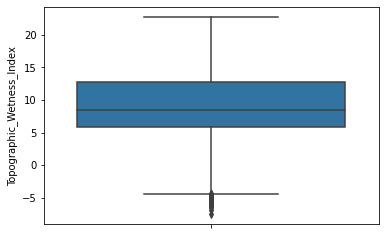

In [50]:
sns.boxplot( y=datos["Topographic_Wetness_Index"] );
plt.show()

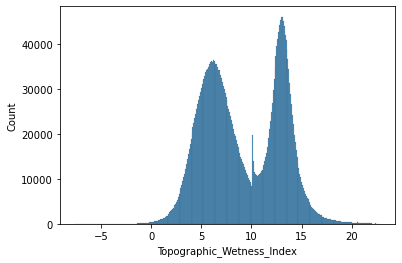

In [51]:
sns.histplot(data=datos, x="Topographic_Wetness_Index")
plt.show()

<hr>

<b>19. UNIDADES EDÁFICAS (Categórica)</b>

In [52]:
print(datos.Unidades_Edaficas.unique())

[6. 2. 1. 3. 4. 5.]


In [53]:
print("Máximo: ", max(datos.Unidades_Edaficas))
print("Mínimo: ", min(datos.Unidades_Edaficas))
print("Media: ", datos["Unidades_Edaficas"].mean())
print("STD: ", datos["Unidades_Edaficas"].std())

Máximo:  6.0
Mínimo:  1.0
Media:  2.971494704914508
STD:  1.7750883965954019


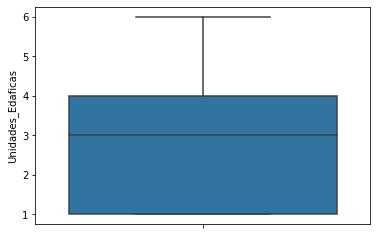

In [54]:
sns.boxplot( y=datos["Unidades_Edaficas"] );
plt.show()

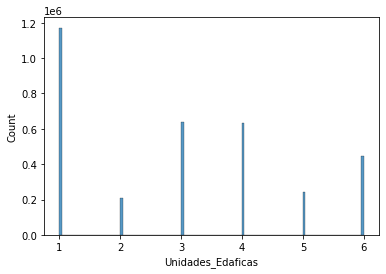

In [55]:
sns.histplot(data=datos, x="Unidades_Edaficas")
plt.show()

<hr>

<b>20. USOS DEL SUELO (Categórica)</b>

In [56]:
print(datos.Usos_Del_Suelo.unique())

[7. 5. 3. 1. 2. 9. 6. 4.]


In [57]:
print("Máximo: ", max(datos.Usos_Del_Suelo))
print("Mínimo: ", min(datos.Usos_Del_Suelo))
print("Media: ", datos["Usos_Del_Suelo"].mean())
print("STD: ", datos["Usos_Del_Suelo"].std())

Máximo:  9.0
Mínimo:  1.0
Media:  4.809815059832879
STD:  0.9010402134952047


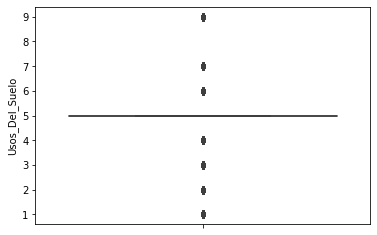

In [58]:
sns.boxplot( y=datos["Usos_Del_Suelo"] );
plt.show()

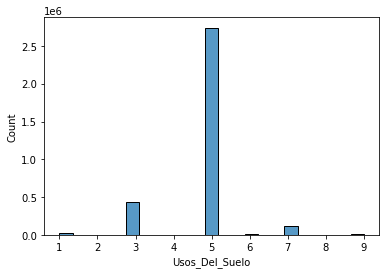

In [59]:
sns.histplot(data=datos, x="Usos_Del_Suelo")
plt.show()

<hr>

<h1>Matriz de correlación de variables</h1>

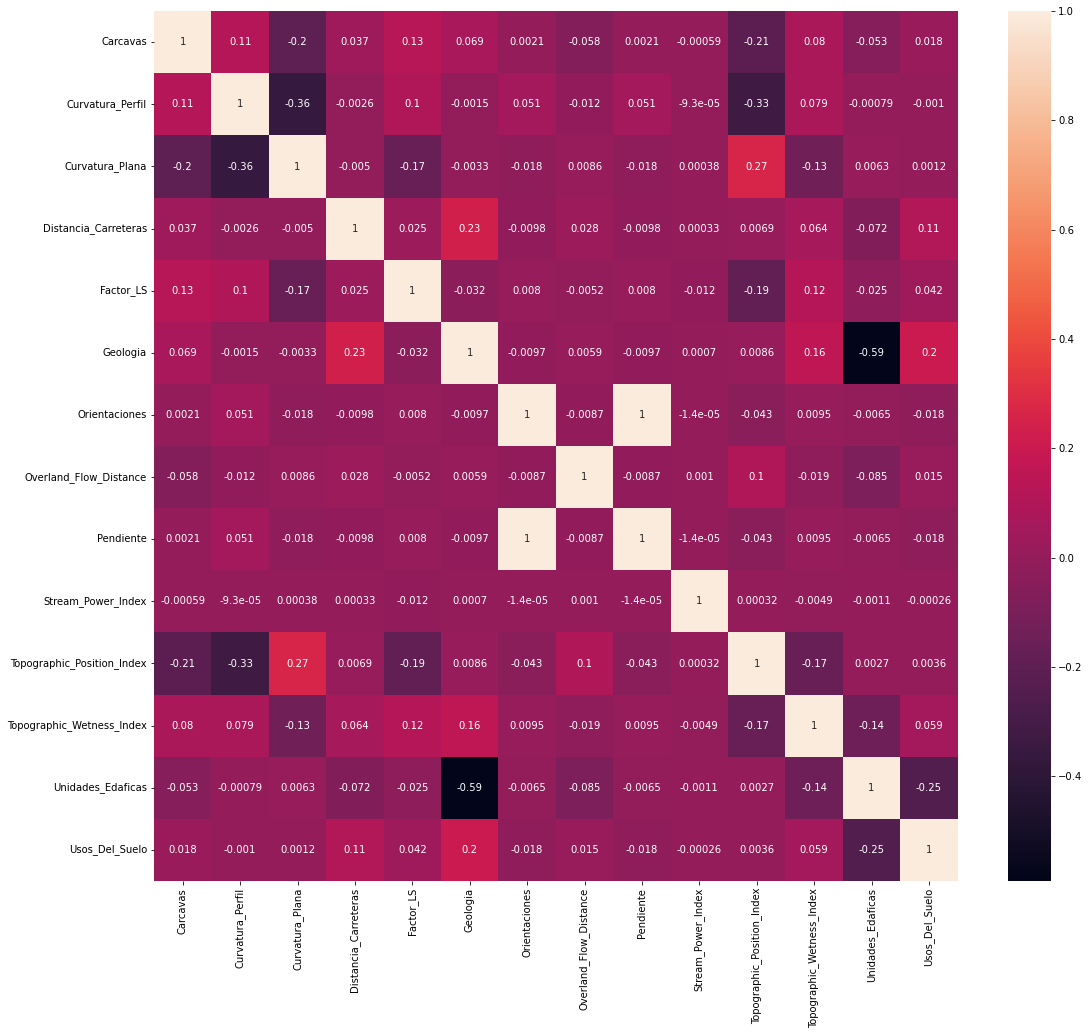

In [60]:
corr_datos = datos.corr(method='pearson')

plt.figure(figsize=(18, 16))
sns.heatmap(corr_datos, annot=True)
plt.show()